<a href="https://colab.research.google.com/github/kunai-3txk/colab/blob/main/Dock_Data_Shaping_for_Pycarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# 3年分データの読み込み
df1=pd.read_csv('/content/drive/MyDrive/Dev/一般配偶者_基礎データ2019.csv',encoding="shift-jis")
df2=pd.read_csv('/content/drive/MyDrive/Dev/一般配偶者_基礎データ2020.csv',encoding="shift-jis")
df3=pd.read_csv('/content/drive/MyDrive/Dev/一般配偶者_基礎データ20211130.csv',encoding="shift-jis")


In [ ]:
import numpy as np
from datetime import datetime, timedelta

#年度情報マスタの作成 全日付分
keys, dates,para = np.meshgrid(
    ["2019"],[pd.date_range(start="2019-03-01", end="2020-03-31", freq="D")],[0])
key_date_df = pd.DataFrame({"App_Date": dates.ravel(),"FY": keys.ravel(),"now":para.ravel()})
keys, dates,para = np.meshgrid(
    ["2020"],[pd.date_range(start="2020-03-01", end="2021-03-31", freq="D")],[0])
key_date_df = key_date_df.append(pd.DataFrame({"App_Date": dates.ravel(),"FY": keys.ravel(),"now":para.ravel()}))
keys, dates,para = np.meshgrid(
    ["2021"],[pd.date_range(start="2021-03-01", end="2021-11-30", freq="D")],[0])
key_date_df = key_date_df.append(pd.DataFrame({"App_Date": dates.ravel(),"FY": keys.ravel(),"now":para.ravel()}))

print(key_date_df)


      App_Date    FY  now
0   2019-03-01  2019    0
1   2019-03-02  2019    0
2   2019-03-03  2019    0
3   2019-03-04  2019    0
4   2019-03-05  2019    0
..         ...   ...  ...
270 2021-11-26  2021    0
271 2021-11-27  2021    0
272 2021-11-28  2021    0
273 2021-11-29  2021    0
274 2021-11-30  2021    0

[1068 rows x 3 columns]


In [ ]:
df1["FY"]='2019'
df2["FY"]='2020'
df3["FY"]='2021'
df4=pd.concat([df1,df2,df3])
df4 = df4[df4['受診者区分']=='配偶者']
df4 = df4.drop('予定日', axis=1)
#データに年度設定と抽出

#df4.head()

#group by 
df5 = df4.groupby(['申込日','FY']).count()

#df5.head()

df6 = df5.reset_index().rename(columns={'申込日': 'App_Date', '受診者区分': 'now'})
df6['App_Date'] = df6['App_Date'].str.replace('年', '/')
df6['App_Date'] = df6['App_Date'].str.replace('月', '/')
df6['App_Date'] = df6['App_Date'].str.replace('日', '/')
df6['App_Date'] = pd.to_datetime(df6['App_Date'])

df6.head()


,App_Date,FY,now
0,2019-10-10,2019,21
1,2019-10-11,2019,20
2,2019-10-12,2019,5
3,2019-10-13,2019,3
4,2019-10-14,2019,1


In [ ]:
# date_df と 結合する
df = pd.merge(key_date_df, df6, on=['App_Date','FY'], how="left")

# NaNを 0で埋める
df["now_y"] = df["now_y"].fillna(0)
df = df.drop('now_x', axis=1)
df = df.reset_index().rename(columns={'now_y': 'now'})

df.tail()

#df.to_csv('/content/drive/MyDrive/Dev/一般配偶者_時系列データ.csv')

,index,App_Date,FY,now
1063,1063,2021-11-26,2021,9.0
1064,1064,2021-11-27,2021,3.0
1065,1065,2021-11-28,2021,2.0
1066,1066,2021-11-29,2021,20.0
1067,1067,2021-11-30,2021,0.0


In [ ]:
import datetime
import locale

locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')
#print(dt.strftime('%A, %a, %B, %b'))
# Monday, Mon, January, Jan
#print(locale.getlocale(locale.LC_TIME))

df["DoW"] = df["App_Date"].dt.strftime('%a')
df["Year"] = df["App_Date"].dt.year
df["Month"] = df["App_Date"].dt.month
df["Day"] = df["App_Date"].dt.day
#日付要素の分解

#debug
#df.to_csv('/content/drive/MyDrive/Dev/一般配偶者_時系列データ.csv')



('en_US', 'UTF-8')


In [ ]:
df.tail()

,index,App_Date,FY,now,DoW,Year,Month,Day
1063,1063,2021-11-26,2021,9.0,Fri,2021,11,26
1064,1064,2021-11-27,2021,3.0,Sat,2021,11,27
1065,1065,2021-11-28,2021,2.0,Sun,2021,11,28
1066,1066,2021-11-29,2021,20.0,Mon,2021,11,29
1067,1067,2021-11-30,2021,0.0,Tue,2021,11,30


In [ ]:
#Pycarat実装
!pip install pycaret
from pycaret.regression import *


In [ ]:
exp1=setup(df,target='now')

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.0647,1.015806e+02,9.5668,5.418000e-01,0.6779,0.8790,0.552
lightgbm,Light Gradient Boosting Machine,6.5409,1.071114e+02,9.8262,5.174000e-01,0.7012,0.9603,0.078
gbr,Gradient Boosting Regressor,6.3686,1.157559e+02,10.0448,4.980000e-01,0.6947,0.9366,0.082
huber,Huber Regressor,7.1737,1.332397e+02,10.9407,4.100000e-01,0.7611,1.1300,0.089
br,Bayesian Ridge,7.4918,1.314287e+02,10.9345,4.067000e-01,0.7896,1.2026,0.027
ridge,Ridge Regression,7.5261,1.317370e+02,10.9613,4.029000e-01,0.7913,1.2138,0.027
lr,Linear Regression,7.5407,1.318969e+02,10.9733,4.012000e-01,0.7925,1.2184,0.514
omp,Orthogonal Matching Pursuit,8.1068,1.629868e+02,12.1817,2.597000e-01,0.8261,1.1800,0.027
et,Extra Trees Regressor,7.0371,1.474872e+02,11.7454,2.459000e-01,0.7586,1.0459,0.516
lasso,Lasso Regression,9.1587,1.772622e+02,12.7303,1.968000e-01,0.9337,1.5741,0.026


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7532, verbose=0, warm_start=False)

In [ ]:
rf=create_model('rf')
rf_tune = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,8.9507,359.0468,18.9485,0.3928,0.6886,0.6899
1,6.1623,79.3818,8.9096,0.5696,0.7967,1.0839
2,6.7597,106.5004,10.3199,0.4001,0.6811,1.2725
3,5.3364,58.7256,7.6633,0.6535,0.6861,0.8217
4,6.0542,65.3882,8.0863,0.4275,0.7258,1.0364
5,5.2151,63.9405,7.9963,0.5399,0.7022,0.9088
6,6.5193,112.5791,10.6103,0.5546,0.7372,1.4422
7,6.6692,92.9376,9.6404,0.5299,0.6213,0.5435
8,6.4499,77.6774,8.8135,0.5003,0.6749,0.8954
9,5.3222,58.6606,7.6590,0.5817,0.8176,1.4555


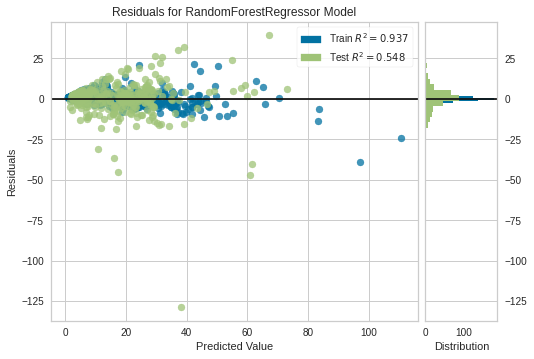

In [ ]:
plot_model(rf)

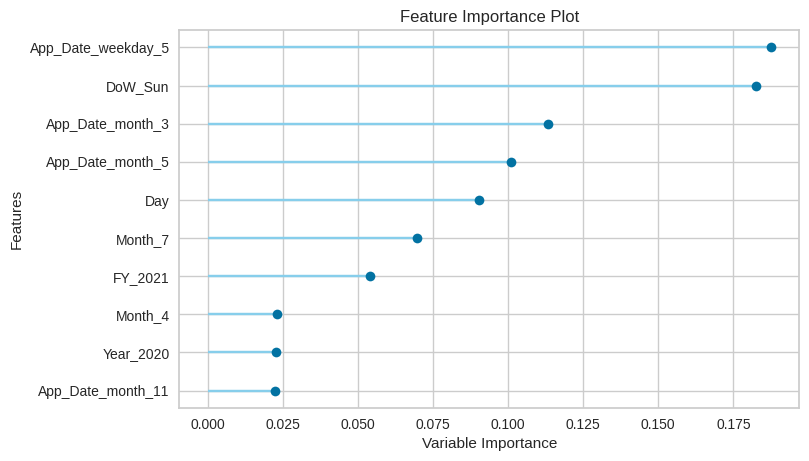

In [ ]:
plot_model(rf_tune,plot='feature')

In [ ]:
test_rf = predict_model(rf_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,6.6242,139.8589,11.8262,0.5392,0.7151,0.8139


In [ ]:
test_rf.tail()

,Day,FY_2019,FY_2020,FY_2021,DoW_Fri,DoW_Sun,DoW_Thu,Year_2019,Year_2020,Year_2021,Month_2,Month_4,Month_6,Month_7,Month_8,App_Date_month_1,App_Date_month_10,App_Date_month_11,App_Date_month_12,App_Date_month_3,App_Date_month_5,App_Date_month_9,App_Date_weekday_0,App_Date_weekday_1,App_Date_weekday_2,App_Date_weekday_5,App_Date_is_month_end_1,App_Date_is_month_start_1,now,Label
316,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,7.730857
317,20.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.180977
318,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,29.137211
319,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.0,37.119434
320,28.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,4.790564
